### Подготовка данных

Более подробно обработка данных описана в домашнем задании по второму семинару, где использовался тот же датасет

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})


norm_min_max = True

# загрузка
data = pd.read_csv('Shanghai_HMT_2010.csv')
# избавляемся от пропущенных значений
data = pd.get_dummies(data).dropna()

# нормировка
if norm_min_max:
    from sklearn import preprocessing
    
    cols_list = data.columns
    normalizer = preprocessing.MinMaxScaler()
    data = pd.DataFrame(
        data=normalizer.fit_transform(data),
        columns=cols_list
    )
    
else:
    data = (data - data.mean()) / data.std()
    
print("Shape of data:", data.shape)
data.head()

Shape of data: (21436, 21)


,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,...,PRES,TEMP,Iws,precipitation,Iprec,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW,cbwd_cv
0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.107261,0.134503,0.110236,0.266667,...,0.66,0.068182,0.098684,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000038,0.0,0.0,0.0,0.043478,1.0,0.108911,0.146199,0.111811,0.266667,...,0.66,0.068182,0.101974,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000114,0.0,0.0,0.0,0.130435,1.0,0.118812,0.150097,0.114961,0.288889,...,0.66,0.068182,0.106908,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000152,0.0,0.0,0.0,0.173913,1.0,0.122112,0.148148,0.119685,0.288889,...,0.66,0.045455,0.111842,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000190,0.0,0.0,0.0,0.217391,1.0,0.118812,0.150097,0.124409,0.288889,...,0.66,0.045455,0.115132,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [2]:
# задача — предсказать, выше ли давление своей медианы или нет
median_pres = data["PRES"].median()
print("Target median:", median_pres)

# создание целевой переменной
data_target = (data["PRES"] >= median_pres).astype(int)
print("\nNumber of samples of each class:\n", data_target.value_counts(), sep="")

# матрица признаков
data_train_test = data.drop("PRES", axis=1)
print("\nShape of train/test data:", data_train_test.shape)
data_train_test.head()

Target median: 0.5199999999999996

Number of samples of each class:
1    11062
0    10374
Name: PRES, dtype: int64

Shape of train/test data: (21436, 20)


,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,TEMP,Iws,precipitation,Iprec,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW,cbwd_cv
0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.107261,0.134503,0.110236,0.266667,0.643309,0.068182,0.098684,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000038,0.0,0.0,0.0,0.043478,1.0,0.108911,0.146199,0.111811,0.266667,0.643309,0.068182,0.101974,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000114,0.0,0.0,0.0,0.130435,1.0,0.118812,0.150097,0.114961,0.288889,0.705557,0.068182,0.106908,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000152,0.0,0.0,0.0,0.173913,1.0,0.122112,0.148148,0.119685,0.288889,0.770337,0.045455,0.111842,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000190,0.0,0.0,0.0,0.217391,1.0,0.118812,0.150097,0.124409,0.288889,0.770337,0.045455,0.115132,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Классы сбалансированы

In [3]:
# для исследований
full_data = pd.concat([data_train_test, data_target], axis=1)
full_data

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,...,TEMP,Iws,precipitation,Iprec,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW,cbwd_cv,PRES
0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.107261,0.134503,0.110236,0.266667,...,0.068182,0.098684,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,0.000038,0.0,0.0,0.0,0.043478,1.0,0.108911,0.146199,0.111811,0.266667,...,0.068182,0.101974,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,0.000114,0.0,0.0,0.0,0.130435,1.0,0.118812,0.150097,0.114961,0.288889,...,0.068182,0.106908,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,0.000152,0.0,0.0,0.0,0.173913,1.0,0.122112,0.148148,0.119685,0.288889,...,0.045455,0.111842,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,0.000190,0.0,0.0,0.0,0.217391,1.0,0.118812,0.150097,0.124409,0.288889,...,0.045455,0.115132,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21431,0.999848,1.0,1.0,1.0,0.782609,1.0,0.151815,0.177388,0.140157,0.333333,...,0.181818,0.019737,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
21432,0.999886,1.0,1.0,1.0,0.826087,1.0,0.140264,0.157895,0.140157,0.355556,...,0.181818,0.024671,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
21433,0.999924,1.0,1.0,1.0,0.869565,1.0,0.135314,0.179337,0.133858,0.400000,...,0.204545,0.031250,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
21434,0.999962,1.0,1.0,1.0,0.913043,1.0,0.138614,0.173489,0.148031,0.400000,...,0.204545,0.036184,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


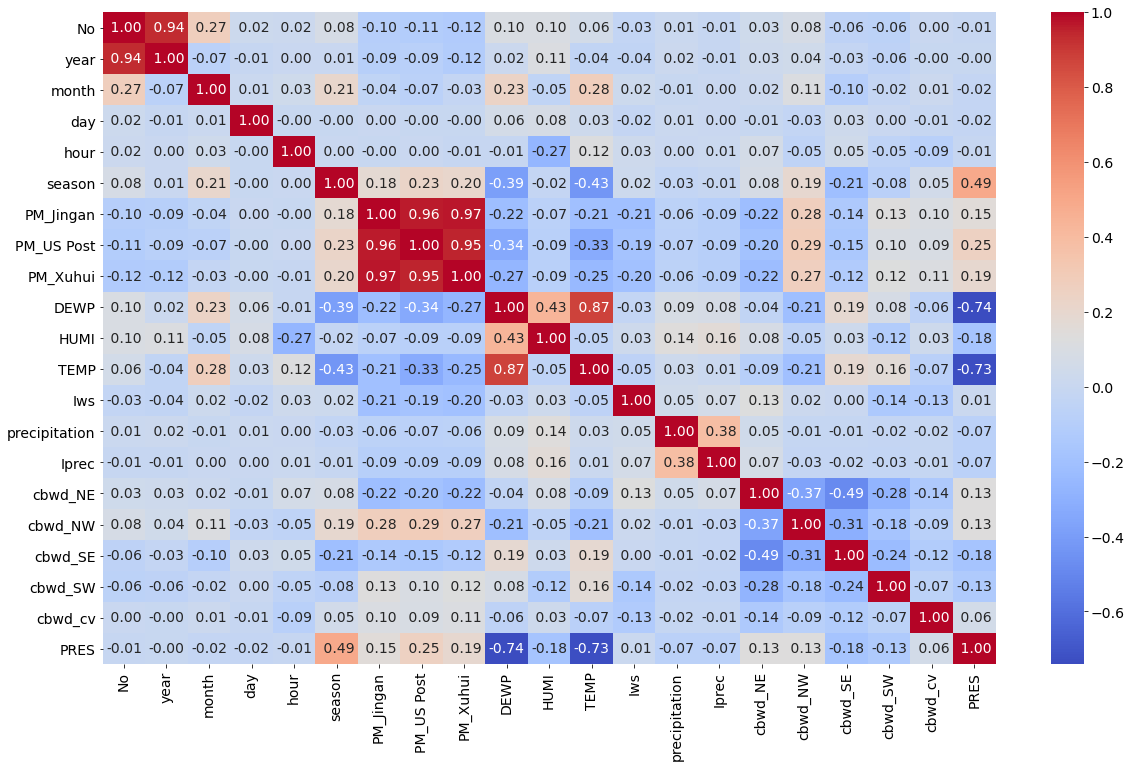

In [4]:
import seaborn as sns

plt.figure(figsize=(20, 12))
sns.heatmap(full_data.corr(method="pearson"), cbar=True, fmt =' .2f', annot=True, cmap='coolwarm')
plt.show()

Как показывает корреляционная матрица, в данных присутствуют коррелирующие друг с другом фичи. Удалим их

In [5]:
data_train_test = data_train_test.drop(
    ["No", "PM_Jingan", "PM_Xuhui", "DEWP"],
    axis=1
)

Построим распределения некоторых признаков с учетом принадлежности объектов одному из классов. Эта информация поможет разделить исходные нелинейные переменные на новые фичи, что потенциально приведет к повышению качества работы логистической регрессии

In [6]:
import numpy as np

# функция отрисовки распределений
def plot_distrib(ax, var_name, df):
    for cls_val, color, alpha in zip([0, 1], ['g', 'r'], [1.0, 0.7]):
        plot_data = pd.Series(
            (df[df.PRES == cls_val][var_name].value_counts() / len(df.PRES)) * 100
        ).sort_index()
        
        plot_data.plot(
            kind='bar',
            color=color,
            alpha=alpha,
            ax=ax
        )
        
        ax.set_xticklabels(np.around(plot_data.index, decimals=2)) 
        ax.set_title(var_name + " (norm vals)")
        ax.legend(["Below median", "Above median"])
        ax.set_ylabel("percentage")

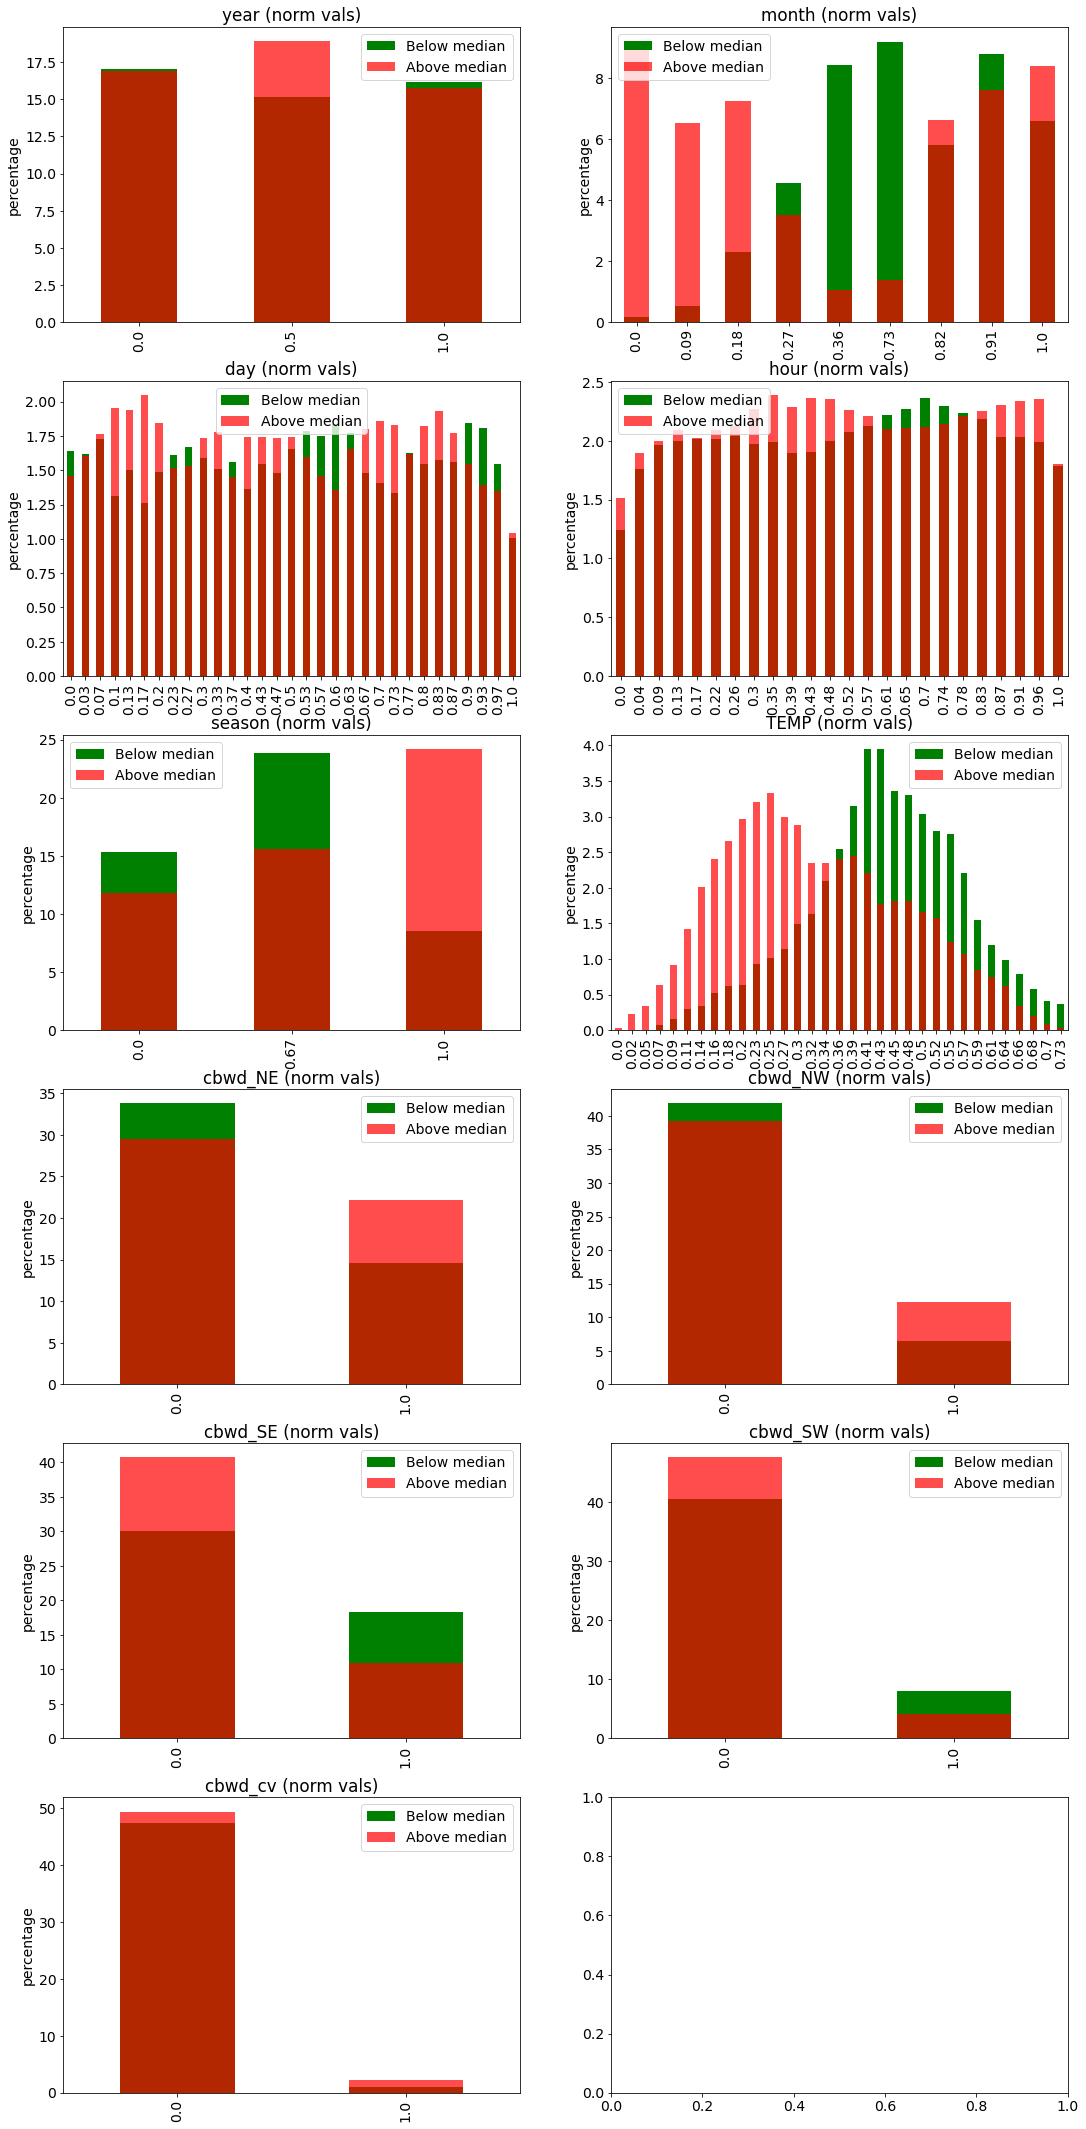

In [7]:
# визуализируем распределения
fig, axs = plt.subplots(
    nrows=6, ncols=2, figsize=(18, 38)
)

list_col_names = list(data_train_test.columns)
for col_name in ["Iprec", "precipitation", "Iws", "HUMI", "PM_US Post"]:
    list_col_names.remove(col_name)

for i, ax in enumerate(axs.flatten()):
    if i == len(list_col_names):
        break
    plot_distrib(ax, list_col_names[i], full_data)

In [8]:
# функция создания бинарных фичей посредством разделения исходных данных на интервалы
def create_feature(features, bins, var_name, prefix):
    var_bin_name = var_name + "_bin"
    features[var_bin_name] = pd.cut(features[var_name], bins)
    
    features = pd.concat([features, pd.get_dummies(features[var_bin_name], prefix=prefix, prefix_sep='_')], axis=1)
    features = features.drop(var_name, axis=1)
    features = features.drop(var_bin_name, axis=1)
    
    return features

In [9]:
# создание фичей на основе анализа визуализации
features = data_train_test.copy()

bins = [0, 0.5, 1.0]
var_name = 'year'
prefix = 'y'
features = create_feature(features, bins, var_name, prefix)

bins = [0, 0.2, 0.75, 1.0]
var_name = 'month'
prefix = 'm'
features = create_feature(features, bins, var_name, prefix)

bins = [0, 0.05, 0.22, 0.28, 0.51, 0.65, 0.88, 1.0]
var_name = 'day'
prefix = 'd'
features = create_feature(features, bins, var_name, prefix)

bins = [0, 0.58, 0.8, 1.0]
var_name = 'hour'
prefix = 'h'
features = create_feature(features, bins, var_name, prefix)

bins = [0, 0.69, 1.0]
var_name = 'season'
prefix = 's'
features = create_feature(features, bins, var_name, prefix)

bins = [0, 0.35, 1.0]
var_name = 'TEMP'
prefix = 'T'
features = create_feature(features, bins, var_name, prefix)

In [10]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21436 entries, 0 to 21435
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PM_US Post      21436 non-null  float64
 1   HUMI            21436 non-null  float64
 2   Iws             21436 non-null  float64
 3   precipitation   21436 non-null  float64
 4   Iprec           21436 non-null  float64
 5   cbwd_NE         21436 non-null  float64
 6   cbwd_NW         21436 non-null  float64
 7   cbwd_SE         21436 non-null  float64
 8   cbwd_SW         21436 non-null  float64
 9   cbwd_cv         21436 non-null  float64
 10  y_(0.0, 0.5]    21436 non-null  uint8  
 11  y_(0.5, 1.0]    21436 non-null  uint8  
 12  m_(0.0, 0.2]    21436 non-null  uint8  
 13  m_(0.2, 0.75]   21436 non-null  uint8  
 14  m_(0.75, 1.0]   21436 non-null  uint8  
 15  d_(0.0, 0.05]   21436 non-null  uint8  
 16  d_(0.05, 0.22]  21436 non-null  uint8  
 17  d_(0.22, 0.28]  21436 non-null 

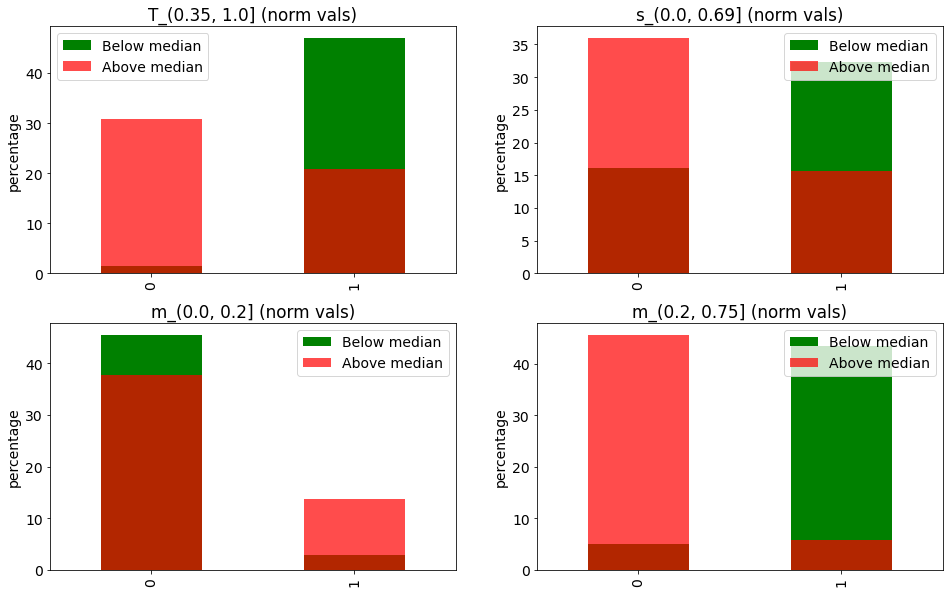

In [11]:
# визуализируем часть созданных распределений
fig, axs = plt.subplots(
    nrows=2, ncols=2, figsize=(16, 10)
)

list_col_names = [
    "T_(0.35, 1.0]",
    "s_(0.0, 0.69]",
    "m_(0.0, 0.2]",
    "m_(0.2, 0.75]",
]

for i, ax in enumerate(axs.flatten()):
    if i == len(list_col_names):
        break
    plot_distrib(ax, list_col_names[i], pd.concat([features, data_target], axis=1))

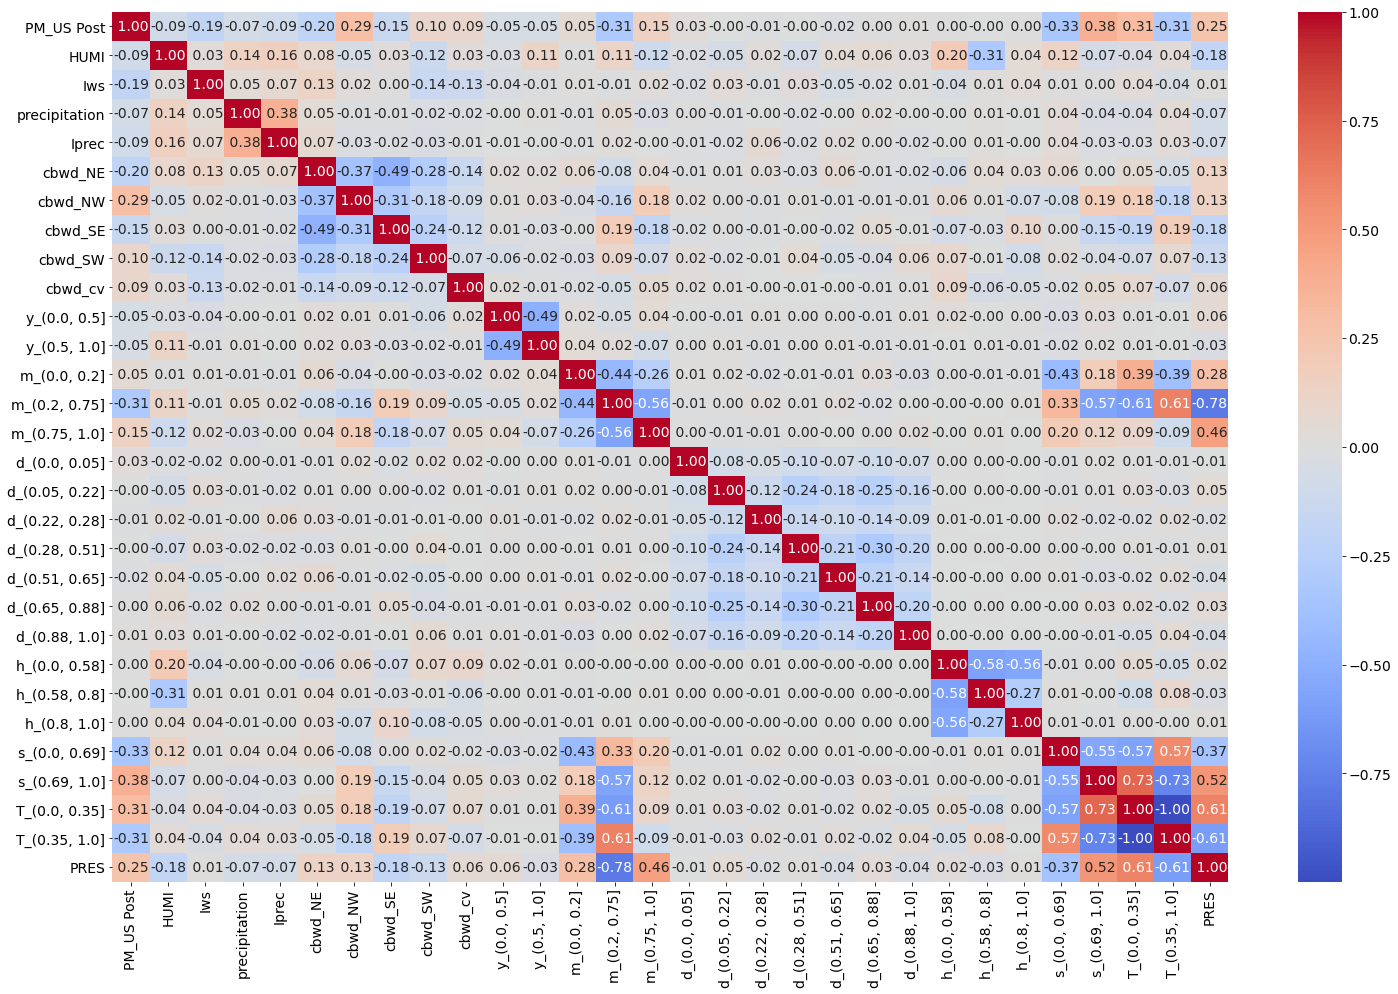

In [12]:
plt.figure(figsize=(25, 16))
sns.heatmap(
    pd.concat([features, data_target], axis=1).corr(method="pearson"),
    cbar=True, fmt =' .2f', annot=True, cmap='coolwarm'
)
plt.show()

Удалим однозначно коррелирующие фичи

In [13]:
features = features.drop(
    "T_(0.0, 0.35]",
    axis=1
)

### Логистическая регрессия из sklearn

In [14]:
# делим данные на тест и трейн
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, data_target, test_size=0.30, random_state=101)

# from sklearn.preprocessing import PolynomialFeatures
# pol = PolynomialFeatures(2)
# X_train, X_test, y_train, y_test = train_test_split(
#     pol.fit_transform(features.to_numpy()), data_target, test_size=0.30, random_state=101
# )

In [15]:
# применяем готовую логистическую регрессию и оцениваем качество
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

sklrn_model = LogisticRegression(penalty='l2', max_iter=400)
sklrn_model.fit(X_train, y_train)

pred = sklrn_model.predict(X_test)
print("Confusion matrix:\n", confusion_matrix(y_test, pred), sep="")
print(
    "\nMetrics:\n",
    classification_report(
        y_test, pred,
        target_names=["below median", "above median"]
    ),
    sep=""
)

Confusion matrix:
[[2855  273]
 [ 318 2985]]

Metrics:
              precision    recall  f1-score   support

below median       0.90      0.91      0.91      3128
above median       0.92      0.90      0.91      3303

    accuracy                           0.91      6431
   macro avg       0.91      0.91      0.91      6431
weighted avg       0.91      0.91      0.91      6431



#### Некоторые интересные визуализации

Используем SHAP, чтобы проинтрепретировать результаты

In [16]:
# раскомментировать для установки SHAP
# !pip install shap

Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

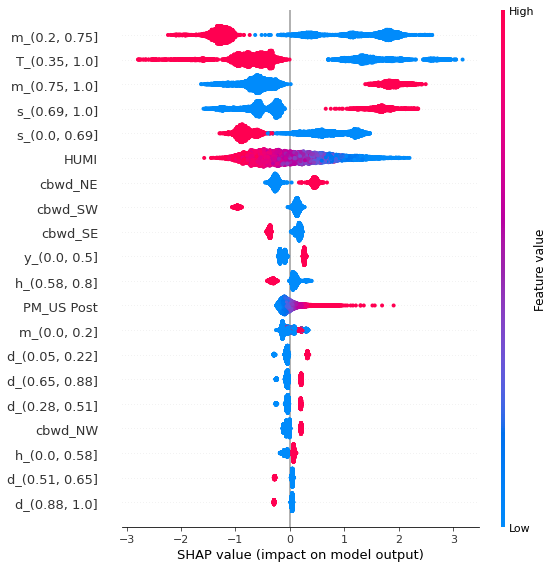

In [17]:
import shap

explainer = shap.LinearExplainer(sklrn_model, masker=shap.maskers.Impute(data=X_train))
shap_values = explainer.shap_values(X_test)
# we need to pass a dense version for the plotting functions
X_test_array = X_test.to_numpy()

shap.summary_plot(shap_values, X_test_array, feature_names=X_test.columns)

Ниже расположен интерактивный график. Возможно, он не будет отображаться до тех пор, пока ноутбук не будет запущен и не будет выполнена эта ячейка

In [18]:
shap.initjs()

ind = 200
shap.force_plot(
    explainer.expected_value, shap_values[:ind, :], X_test_array[:ind, :],
    feature_names=X_test.columns
)

### Логистическая регрессия на основе кода из семинара

In [19]:
import torch

In [20]:
class MyLogisticRegression(object):
    """
    LogisticRegression class for binary classification
    based on seminar 3 notebook "pytorch_logreg.ipynb".
    
    :param learning_rate: Coefficient for gradient descent step. Float.
    :param tol: Tolerance value. If the difference between loss on current epoch
                and previous one is lower than tol, training stops. Float.
    :param device: Indicates whether computations are performed on CPU or GPU.
                   Possible values are: "cpu" or "cuda".
    :param penalty: Type of regularization to use: "l2", "l1" or None.
    :param C: Coefficient in front of regularization term. The lower the value
              the lower penalty (in sklearn it's vice versa). Float.
    :param max_iter: Maximum number of epochs to perform. Integer.
    :param batch_size: Number of samples used for gradient computation on each step. Integer.
    :param include_last: Indicates whether include last part of data that got underbatched
                         or not. Boolean.
    :param verbose: If True learning statistics are be printed each 10 epochs. Boolean.
    """
    
    def __init__(self, learning_rate=1e-3, tol=1e-10, device="cpu", penalty="l2",
                 C=1.0, max_iter=100, batch_size=256, include_last=True, verbose=False):
        self.lr = learning_rate
        self.tol = tol
        
        assert device == "cpu" or device == "cuda", "Wrong device type! Use 'cpu' or 'cuda'."
        self.device = device
        
        assert penalty == "l2" or penalty == "l1" or penalty is None, "Wrong penalty type! Use None, 'l1' or 'l2'."
        if penalty == "l2":
            self.reg_func = lambda loss, w: loss + C * torch.norm(w, p=2)
        elif penalty == "l1":
            self.reg_func = lambda loss, w: loss + C * torch.norm(w, p=1)
        elif penalty is None:
            self.reg_func = lambda loss, w: loss
        
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.include_last = include_last
        self.verbose = verbose
        
        self.w, self.b, self.history = None, None, None
    
    
    def prepare_weights_(self, num_features, init_range=1e-2):
        """
        Initialize weights with random values before training.
        
        :param num_features: Number of columns in feature matrix which is equal to
                             resulting dimension of weights vector. Integer.
        :param init_range: Weights are distributed between [-init_range, init_range]. Float.
        
        :return: Vector of weights and bias term that are ready for training step.
        """
        # weights vector
        w = torch.rand(num_features, dtype=torch.float32, requires_grad=True).to(self.device)
        w = 2.0 * init_range * w - init_range
        w.grad = torch.zeros(num_features).to(self.device)
        w.retain_grad()
        
        # bias term
        b = torch.zeros(1, dtype=torch.float32, requires_grad=True).to(self.device)
        b.grad = torch.zeros(1).to(self.device)
        b.retain_grad()
        
        return w, b
    
    
    def process_batch_(self, x_batch, y_batch, loss, weights, bias):
        """
        Perform one SGD step on a given batch of data.
        Updates given weights and bias term and returns loss.
        
        :param x_batch: Training features. torch.Tensor.
        :param y_batch: Training targets. torch.Tensor.
        :param loss: Batch loss variable upon which gradients are computed. torch.Tensor.
        :param weights: Vector of model weights. torch.Tensor.
        :param bias: Bias term of model. torch.Tensor.
        
        :return: Loss per batch.
        """
        # get outputs and calculate loss
        outputs = 1.0 / (1.0 + torch.exp(-(x_batch @ weights + bias)))
        loss = (outputs - y_batch).pow(2).sum()
        loss = self.reg_func(loss, weights)
        
        # compute gradients
        loss.backward(retain_graph=True)
        
        # SGD step, update weights
        weights.data -= self.lr * weights.grad.data
        bias.data -= self.lr * bias.grad.data
        
        #zero gradients
        weights.grad.data.zero_()
        bias.grad.data.zero_()
        
        return loss
        
    
    def fit(self, X_train, y_train):
        """
        Perform model training with parameters specified while class initialization.
        
        :param X_train: Feature matrix of train samples containing numeric data. pd.DataFrame.
        :param y_train: Target column of train samples containing 0 and 1 values. pd.Series.
        """
        assert X_train.shape[0] == y_train.shape[0], "Features and target data shape doesn't match!"
        
        # weights initialization
        self.w, self.b = self.prepare_weights_(X_train.shape[1])
        
        # prepare data for training
        train_data = torch.tensor(X_train.to_numpy(), dtype=torch.float32).to(self.device)
        target_data = torch.tensor(y_train.to_numpy(), dtype=torch.long).to(self.device)
        
        self.history = list()
        print("Training...")
        for epoch in range(0, self.max_iter):
            # loss for entire epoch
            tot_loss = 0.0
            # loss variable for batch
            loss = torch.zeros(1, dtype=torch.float32, requires_grad=True).to(self.device)
            loss.grad = torch.zeros(1).to(self.device)
            loss.retain_grad()
            
            # create unique indices order for batch iteration for each epoch
            indices = np.arange(0, len(train_data))
            np.random.shuffle(indices)
            # number of full batches with specified size
            num_batches = len(train_data) // self.batch_size
            # iterate over full batches with size of batch_size
            for ind in range(num_batches):
                # get batch data
                x_batch = train_data[indices[ind*self.batch_size : (ind+1)*self.batch_size]]
                y_batch = target_data[indices[ind*self.batch_size : (ind+1)*self.batch_size]]
                # calculate loss and perform SGD step
                loss = self.process_batch_(x_batch, y_batch, loss, self.w, self.b)
                # calculate average loss per sample
                tot_loss += loss.cpu().data.numpy() / self.batch_size
                
            # process last part of data if needed
            if self.include_last and (len(train_data) - num_batches*self.batch_size) >= 1:
                # get data
                x_batch = train_data[indices[num_batches*self.batch_size : len(train_data)]]
                y_batch = target_data[indices[num_batches*self.batch_size : len(train_data)]]
                # calculate loss and perform SGD step
                loss = self.process_batch_(x_batch, y_batch, loss, self.w, self.b)
                # calculate average loss per sample
                tot_loss += loss.cpu().data.numpy() / (len(train_data) - num_batches*self.batch_size)
                
            # write current loss to history
            self.history.append(tot_loss)
            
            # stop training if there is no significant loss change
            tol_stopped = False
            if epoch > 1 and np.abs(self.history[-1] - self.history[-2]) <= self.tol:
                print(f"Training stopped due to loss reaching tolerance level.\nFinal iteration number: {epoch+1}")
                tol_stopped = True
                break
            
            if self.verbose and epoch % 10 == 0:
                print("epoch #%i | mean loss = %.3f" % (epoch, np.mean(self.history[-10:])))
        
        if not tol_stopped:
            print("Max iterations number reached. Training stopped.")
    
    
    def predict(self, X_test):
        """
        Predict classes using given data.
        
        :param X_test: Data to perform predictions on. pd.DataFrame.
        
        :return: Predictions. numpy.ndarray of lenght len(X_test).
        """
        # prepare data for test step
        test_data = torch.tensor(X_test.to_numpy(), dtype=torch.float32).to(self.device)
        # perform predictions
        with torch.no_grad():
            outputs = 1.0 / (1.0 + torch.exp(-(test_data @ self.w + self.b)))
            outputs = (outputs.detach().to('cpu').numpy() >= 0.5).astype(int)
            
        return outputs

Протестируем написанный класс и сравним результаты его работы с аналогом из sklearn

In [41]:
# Объявление
custom_model = MyLogisticRegression(
    learning_rate=1e-2,
    tol=1e-10,
    device="cpu",
    penalty="l2",
    C=0.1,
    max_iter=400,
    batch_size=256,
    include_last=True,
    verbose=True
)

Примечание: при обучении на GPU большая часть времени тратится на загрузку данных, поэтому рекомендуется использовать большой batch_size (порядка 1e+3)

In [42]:
# Обучение
custom_model.fit(X_train, y_train)

Training...
epoch #0 | mean loss = 5.804
epoch #10 | mean loss = 4.427
epoch #20 | mean loss = 4.289
epoch #30 | mean loss = 4.280
epoch #40 | mean loss = 4.271
epoch #50 | mean loss = 4.261
epoch #60 | mean loss = 4.261
epoch #70 | mean loss = 4.258
epoch #80 | mean loss = 4.255
epoch #90 | mean loss = 4.252
epoch #100 | mean loss = 4.255
epoch #110 | mean loss = 4.251
epoch #120 | mean loss = 4.251
epoch #130 | mean loss = 4.251
epoch #140 | mean loss = 4.248
epoch #150 | mean loss = 4.249
epoch #160 | mean loss = 4.248
epoch #170 | mean loss = 4.249
epoch #180 | mean loss = 4.249
epoch #190 | mean loss = 4.248
epoch #200 | mean loss = 4.248
epoch #210 | mean loss = 4.247
epoch #220 | mean loss = 4.245
epoch #230 | mean loss = 4.249
epoch #240 | mean loss = 4.249
epoch #250 | mean loss = 4.250
epoch #260 | mean loss = 4.249
epoch #270 | mean loss = 4.245
epoch #280 | mean loss = 4.246
epoch #290 | mean loss = 4.249
epoch #300 | mean loss = 4.246
epoch #310 | mean loss = 4.247
epoch #

In [43]:
# Выполним предсказания и оценим качество
custom_preds = custom_model.predict(X_test)

print("Confusion matrix:\n", confusion_matrix(y_test, custom_preds), sep="")
print(
    "\nMetrics:\n",
    classification_report(
        y_test, custom_preds,
        target_names=["below median", "above median"]
    ),
    sep=""
)

Confusion matrix:
[[2836  292]
 [ 309 2994]]

Metrics:
              precision    recall  f1-score   support

below median       0.90      0.91      0.90      3128
above median       0.91      0.91      0.91      3303

    accuracy                           0.91      6431
   macro avg       0.91      0.91      0.91      6431
weighted avg       0.91      0.91      0.91      6431



**Результаты практически не отличаются от полученных с помощью аналога из sklearn. Качество такое же.**

In [44]:
print("="*10, "Results obtained with sklearn", 10*"=", '\n')
print("Confusion matrix:\n", confusion_matrix(y_test, pred), sep="")
print(
    "\nMetrics:\n",
    classification_report(
        y_test, pred,
        target_names=["below median", "above median"]
    ),
    sep=""
)

========== Results obtained with sklearn ========== 

Confusion matrix:
[[2855  273]
 [ 318 2985]]

Metrics:
              precision    recall  f1-score   support

below median       0.90      0.91      0.91      3128
above median       0.92      0.90      0.91      3303

    accuracy                           0.91      6431
   macro avg       0.91      0.91      0.91      6431
weighted avg       0.91      0.91      0.91      6431



Различия:

1. **Для above median** упал precision на 0.01, но recall вырос на то же значение
2. **Для below median** значения precision и recall не изменились в первых трех знаках, но f1-score упал на 0.01, что говорит о небольшом ухудшении значений для этого класса